# Exercise 6 - Data Cleaning with Pandas

Load in the dataset `renfe_trains.csv`

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/renfe_trains.csv')

### Initial Data Inspection

Inspect the columns of the DataFrame. Specifically, consider the type of each column and whether it seems reasonable. If not, imvestigate why.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85948 entries, 0 to 85947
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company        85948 non-null  object
 1   origin         85948 non-null  object
 2   destination    85948 non-null  object
 3   departure      85948 non-null  object
 4   arrival        85948 non-null  object
 5   vehicle_class  77116 non-null  object
 6   price          72769 non-null  object
 7   fare           77116 non-null  object
dtypes: object(8)
memory usage: 5.2+ MB


In [3]:
df['price'].value_counts()

price
price    3875
76.3     3794
85.1     3615
107.7    2845
53.4     2719
         ... 
98.01       1
98.2        1
69.05       1
19.75       1
61.15       1
Name: count, Length: 389, dtype: int64

It seems like we have some bad values in the `price` column with the value 'price'. Let's inspect a the rows where this is the case. 

In [4]:
df[df['price']=='price']

company  origin  destination  departure  arrival  vehicle_class  price  \
69     company  origin  destination  departure  arrival  vehicle_class  price   
146    company  origin  destination  departure  arrival  vehicle_class  price   
209    company  origin  destination  departure  arrival  vehicle_class  price   
287    company  origin  destination  departure  arrival  vehicle_class  price   
347    company  origin  destination  departure  arrival  vehicle_class  price   
...        ...     ...          ...        ...      ...            ...    ...   
85903  company  origin  destination  departure  arrival  vehicle_class  price   
85908  company  origin  destination  departure  arrival  vehicle_class  price   
85921  company  origin  destination  departure  arrival  vehicle_class  price   
85934  company  origin  destination  departure  arrival  vehicle_class  price   
85942  company  origin  destination  departure  arrival  vehicle_class  price   

       fare  
69     fare  
146    fare  
209    fare  
287    fare  
347    fare  
...     ...  
85903  fare  
85908  fare  
85921  fare  
85934  fare  
85942  fare  

[3875 rows x 8 columns]

It looks like some sort of error has meant the column names have been fed into the data in intervals. Let's drop these rows as they are clearly an accident.

In [5]:
df = df[df['price'] != 'price']

In [6]:
df['price'].value_counts()

price
76.3     3794
85.1     3615
107.7    2845
53.4     2719
60.3     2544
         ... 
49.67       1
166.6       1
69.39       1
55.85       1
61.15       1
Name: count, Length: 388, dtype: int64

We can now represent `price` as having the appropriate type. Convert it so that it does.

In [7]:
df['price'] = df['price'].astype(np.float32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82073 entries, 0 to 85947
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        82073 non-null  object 
 1   origin         82073 non-null  object 
 2   destination    82073 non-null  object 
 3   departure      82073 non-null  object 
 4   arrival        82073 non-null  object 
 5   vehicle_class  73241 non-null  object 
 6   price          68894 non-null  float32
 7   fare           73241 non-null  object 
dtypes: float32(1), object(7)
memory usage: 5.3+ MB


### Missing Values

Identify whether there are missing values in the DataFrame. 

Which columns are they in?

Inspect some rows which contain them.

In [9]:
df.isna().any()

company          False
origin           False
destination      False
departure        False
arrival          False
vehicle_class     True
price             True
fare              True
dtype: bool

In [10]:
df.isna().sum()

company              0
origin               0
destination          0
departure            0
arrival              0
vehicle_class     8832
price            13179
fare              8832
dtype: int64

In [11]:
df[df['price'].isna()]

company  origin destination            departure              arrival  \
11      renfe  MADRID   BARCELONA  2019-05-03 18:30:00  2019-05-03 21:20:00   
15      renfe  MADRID   BARCELONA  2019-04-23 07:30:00  2019-04-23 10:40:00   
33      renfe  MADRID     SEVILLA  2019-04-21 21:25:00  2019-04-22 00:10:00   
52      renfe  MADRID     SEVILLA  2019-04-17 09:45:00  2019-04-17 12:27:00   
65      renfe  MADRID     SEVILLA  2019-05-03 13:30:00  2019-05-03 16:05:00   
...       ...     ...         ...                  ...                  ...   
85847   renfe  MADRID     SEVILLA  2020-11-22 09:00:00  2020-11-22 11:37:48   
85850   renfe  MADRID     SEVILLA  2020-10-13 11:22:00  2020-10-13 16:05:12   
85854   renfe  MADRID   BARCELONA  2020-11-06 10:30:00  2020-11-06 13:15:00   
85866   renfe  MADRID     SEVILLA  2020-12-04 12:00:00  2020-12-04 14:31:48   
85871   renfe  MADRID     SEVILLA  2020-10-13 11:22:00  2020-10-13 16:05:12   

      vehicle_class  price      fare  
11       Preferente    NaN     Promo  
15          Turista    NaN     Promo  
33              NaN    NaN       NaN  
52          Turista    NaN  Flexible  
65          Turista    NaN     Promo  
...             ...    ...       ...  
85847           NaN    NaN       NaN  
85850           NaN    NaN       NaN  
85854           NaN    NaN       NaN  
85866           NaN    NaN       NaN  
85871           NaN    NaN       NaN  

[13179 rows x 8 columns]

Drop all rows with missing values across all three columns `vehicle_class`, `price`, and `fare`

In [12]:
df.dropna(subset = ['vehicle_class', 'price', 'fare'],
          how='all',
          inplace=True
         )

In [13]:
df.isna().sum()

company             0
origin              0
destination         0
departure           0
arrival             0
vehicle_class       0
price            4347
fare                0
dtype: int64

Run the below code. What does it sugest about ticket price with respect to `vehicle_class` and `fare`?

In [14]:
df[['vehicle_class', 'fare', 'price']].groupby(['vehicle_class', 'fare']).mean()

price
vehicle_class            fare                               
Cama G. Clase            Doble Familiar-Flexible   98.199997
                         Individual-Flexible      150.600006
Cama Turista             Flexible                  74.224998
Preferente               Flexible                 118.568962
                         Mesa                     342.799988
                         Promo                     76.151573
                         Promo +                   91.770325
PreferenteSólo plaza H   Flexible                  87.400002
                         Promo                     60.819565
Turista                  Adulto ida                44.249088
                         Básica                    46.240158
                         COD.PROMOCIONAL           68.483330
                         Flexible                  85.300377
                         Mesa                     172.399994
                         Promo                     64.925781
                         Promo +                   72.272072
                         YOVOY                     53.171658
Turista Plus             Flexible                 124.547058
                         Mesa                     206.800003
                         Promo                     86.225685
                         Promo +                   81.960510
                         YOVOY                     61.976925
Turista PlusSólo plaza H Flexible                  80.599998
Turista con enlace       Flexible                  62.770576
                         Promo                     45.170784
                         Promo +                   40.896313
                         YOVOY                     33.099998
TuristaSólo plaza H      Flexible                  95.176750
                         Promo                     80.128578

For now, we want you to fill the missing `price` with the mean of all prices. However, in the extention, you can try to tackle this more correctly (and trickily!).

Fill the missing `price` values with the mean of all prices.

In [15]:
df.fillna({'price': df['price'].mean()},
         inplace=True)

Check you have gotten rid of all `NaN` values.

In [16]:
df.isna().sum()

company          0
origin           0
destination      0
departure        0
arrival          0
vehicle_class    0
price            0
fare             0
dtype: int64

### Deduplication

Use `duplicated` to see whether the dataset contains any duplicated rows

In [17]:
df[df.duplicated()]

company  origin destination            departure              arrival  \
39      renfe  MADRID   BARCELONA  2019-04-30 07:00:00  2019-04-30 09:30:00   
71      renfe  MADRID     SEVILLA  2019-05-18 09:00:00  2019-05-18 11:38:00   
83      renfe  MADRID   BARCELONA  2019-05-27 17:00:00  2019-05-27 19:30:00   
132     renfe  MADRID   BARCELONA  2019-05-10 08:30:00  2019-05-10 11:15:00   
174     renfe  MADRID   BARCELONA  2019-05-13 14:00:00  2019-05-13 16:30:00   
...       ...     ...         ...                  ...                  ...   
85936   renfe  MADRID     SEVILLA  2020-10-28 07:00:00  2020-10-28 09:31:48   
85938   renfe  MADRID   BARCELONA  2020-10-12 07:30:00  2020-10-12 10:40:12   
85939   renfe  MADRID   BARCELONA  2020-10-13 07:00:00  2020-10-13 09:30:00   
85945   renfe  MADRID   BARCELONA  2020-10-23 07:30:00  2020-10-23 10:40:12   
85947   renfe  MADRID   BARCELONA  2020-11-08 16:30:00  2020-11-08 19:15:00   

      vehicle_class       price      fare  
39     Turista Plus   94.550003     Promo  
71          Turista   76.300003  Flexible  
83          Turista   88.949997     Promo  
132         Turista   85.099998     Promo  
174         Turista   68.650002     Promo  
...             ...         ...       ...  
85936       Turista   33.150002   Promo +  
85938       Turista  108.900002  Flexible  
85939       Turista  107.949997   Promo +  
85945       Turista   46.849998   Promo +  
85947       Turista  108.900002  Flexible  

[43517 rows x 8 columns]

As the dataset constitutes ticket price search results, theres a good chance duplication has come about due to the data collection method. For example, there are many tickets available on each train. We would want to investigate this further, but to use the functionality, lets get rid of these duplicate rows.

In [18]:
df.drop_duplicates(inplace=True)

### Data Transformation

Now that we have a dataset without the above errors, we want to add some meaningful columns. 

First, lets bin `price` into three groups and add that as column to the DataFrame called `price_bin`. 

The bins should be `[(0, 150], (150, 300], (300, 450]]`.

In [19]:
df['price_bin'] = pd.cut(x = df['price'],
       bins = [0, 150, 300, 450])

Plot a bar chart of the binned prices

<Axes: xlabel='price_bin'>

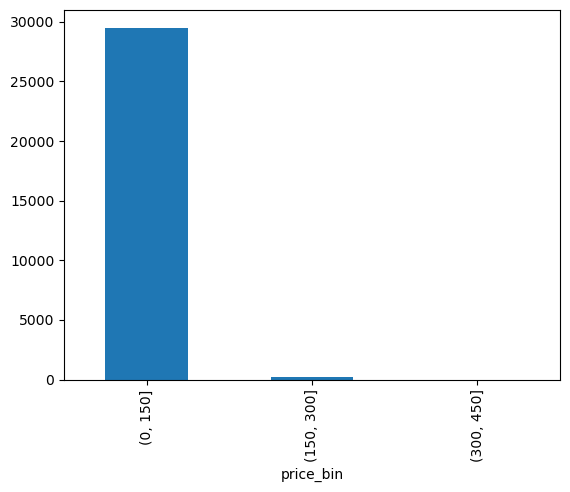

In [20]:
df['price_bin'].value_counts().plot(kind='bar')

Compute the amount of tax that would need to be paid if vat is at 20% and prices aren't inclusive of it.

In [21]:
df['price'] * 0.20

0        13.880000
1         8.710000
2        17.020000
3        21.539999
4        21.539999
           ...    
85940    10.140000
85941    10.140000
85943    11.050000
85944    11.110000
85946    19.340000
Name: price, Length: 29724, dtype: float32

### Text Data Manipulation

Capitalise the word `renfe` in the `company` column

In [22]:
df['company'] = df['company'].str.upper()

Generate a statistical summary of trips whose `vehicle_class` contains `Turista`

In [23]:
df[df['vehicle_class'].str.contains('Turista')].describe()

price
count  26171.000000
mean      70.803299
std       22.684448
min       16.750000
25%       53.400002
50%       71.493797
75%       85.099998
max      206.800003

Display all rows whose `fare` ends with a `+`

In [24]:
df[df['fare'].str.match(r'.*\+$')]

company  origin destination            departure              arrival  \
118     RENFE  MADRID     SEVILLA  2019-05-04 12:00:00  2019-05-04 14:32:00   
139     RENFE  MADRID     SEVILLA  2019-04-26 13:10:00  2019-04-26 20:51:00   
394     RENFE  MADRID     SEVILLA  2019-04-15 13:10:00  2019-04-15 20:51:00   
804     RENFE  MADRID     SEVILLA  2019-04-14 13:00:00  2019-04-14 15:40:00   
818     RENFE  MADRID     SEVILLA  2019-04-26 13:10:00  2019-04-26 20:51:00   
...       ...     ...         ...                  ...                  ...   
85927   RENFE  MADRID   BARCELONA  2020-11-02 07:00:00  2020-11-02 09:30:00   
85928   RENFE  MADRID     SEVILLA  2020-11-17 16:00:00  2020-11-17 18:30:00   
85935   RENFE  MADRID     SEVILLA  2020-10-21 16:00:00  2020-10-21 18:30:00   
85943   RENFE  MADRID   BARCELONA  2020-10-20 08:00:00  2020-10-20 10:30:00   
85944   RENFE  MADRID   BARCELONA  2020-10-27 09:30:00  2020-10-27 12:34:12   

            vehicle_class      price     fare price_bin  
118    Turista con enlace  71.493797  Promo +  (0, 150]  
139    Turista con enlace  34.349998  Promo +  (0, 150]  
394    Turista con enlace  34.349998  Promo +  (0, 150]  
804    Turista con enlace  71.493797  Promo +  (0, 150]  
818    Turista con enlace  71.493797  Promo +  (0, 150]  
...                   ...        ...      ...       ...  
85927             Turista  86.099998  Promo +  (0, 150]  
85928             Turista  39.299999  Promo +  (0, 150]  
85935             Turista  45.500000  Promo +  (0, 150]  
85943             Turista  55.250000  Promo +  (0, 150]  
85944             Turista  55.549999  Promo +  (0, 150]  

[2383 rows x 9 columns]

### Stretch Exercises

As it appears `price` depends upon `vehicle_class` and `fare`, we choose to replace missing `price` values with the average for their `vehicle_class` and `fare` category. Write some code which does this.

In [25]:
df['price'] = df[['vehicle_class', 'fare', 'price']].groupby(['vehicle_class', 'fare'])['price'].transform(lambda p : p.fillna(p.mean()))
df

company  origin destination            departure              arrival  \
0       RENFE  MADRID     SEVILLA  2019-05-07 19:00:00  2019-05-07 21:38:00   
1       RENFE  MADRID     SEVILLA  2019-05-07 21:25:00  2019-05-08 00:10:00   
2       RENFE  MADRID   BARCELONA  2019-05-11 08:30:00  2019-05-11 11:15:00   
3       RENFE  MADRID   BARCELONA  2019-04-18 14:30:00  2019-04-18 17:21:00   
4       RENFE  MADRID   BARCELONA  2019-04-28 16:30:00  2019-04-28 19:15:00   
...       ...     ...         ...                  ...                  ...   
85940   RENFE  MADRID     SEVILLA  2020-12-02 10:18:00  2020-12-02 18:57:00   
85941   RENFE  MADRID     SEVILLA  2020-10-15 10:18:00  2020-10-15 18:57:00   
85943   RENFE  MADRID   BARCELONA  2020-10-20 08:00:00  2020-10-20 10:30:00   
85944   RENFE  MADRID   BARCELONA  2020-10-27 09:30:00  2020-10-27 12:34:12   
85946   RENFE  MADRID   BARCELONA  2020-10-08 07:40:00  2020-10-08 13:55:00   

            vehicle_class       price        fare price_bin  
0              Preferente   69.400002       Promo  (0, 150]  
1                 Turista   43.549999       Promo  (0, 150]  
2                 Turista   85.099998       Promo  (0, 150]  
3                 Turista  107.699997    Flexible  (0, 150]  
4                 Turista  107.699997    Flexible  (0, 150]  
...                   ...         ...         ...       ...  
85940             Turista   50.700001  Adulto ida  (0, 150]  
85941             Turista   50.700001  Adulto ida  (0, 150]  
85943             Turista   55.250000     Promo +  (0, 150]  
85944             Turista   55.549999     Promo +  (0, 150]  
85946  Turista con enlace   96.699997    Flexible  (0, 150]  

[29724 rows x 9 columns]